In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
data=pd.read_csv("ToyotaCorolla.csv",encoding="latin1")

In [7]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [9]:
data=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)

In [10]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
data2=data.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"},axis=1)

In [12]:
data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [13]:
data2[data2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
data3=data2.drop_duplicates().reset_index(drop=True)

In [16]:
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [17]:
data3.describe

<bound method NDFrame.describe of       Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]>

In [19]:
data3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [20]:
sns.set_style(style="darkgrid")

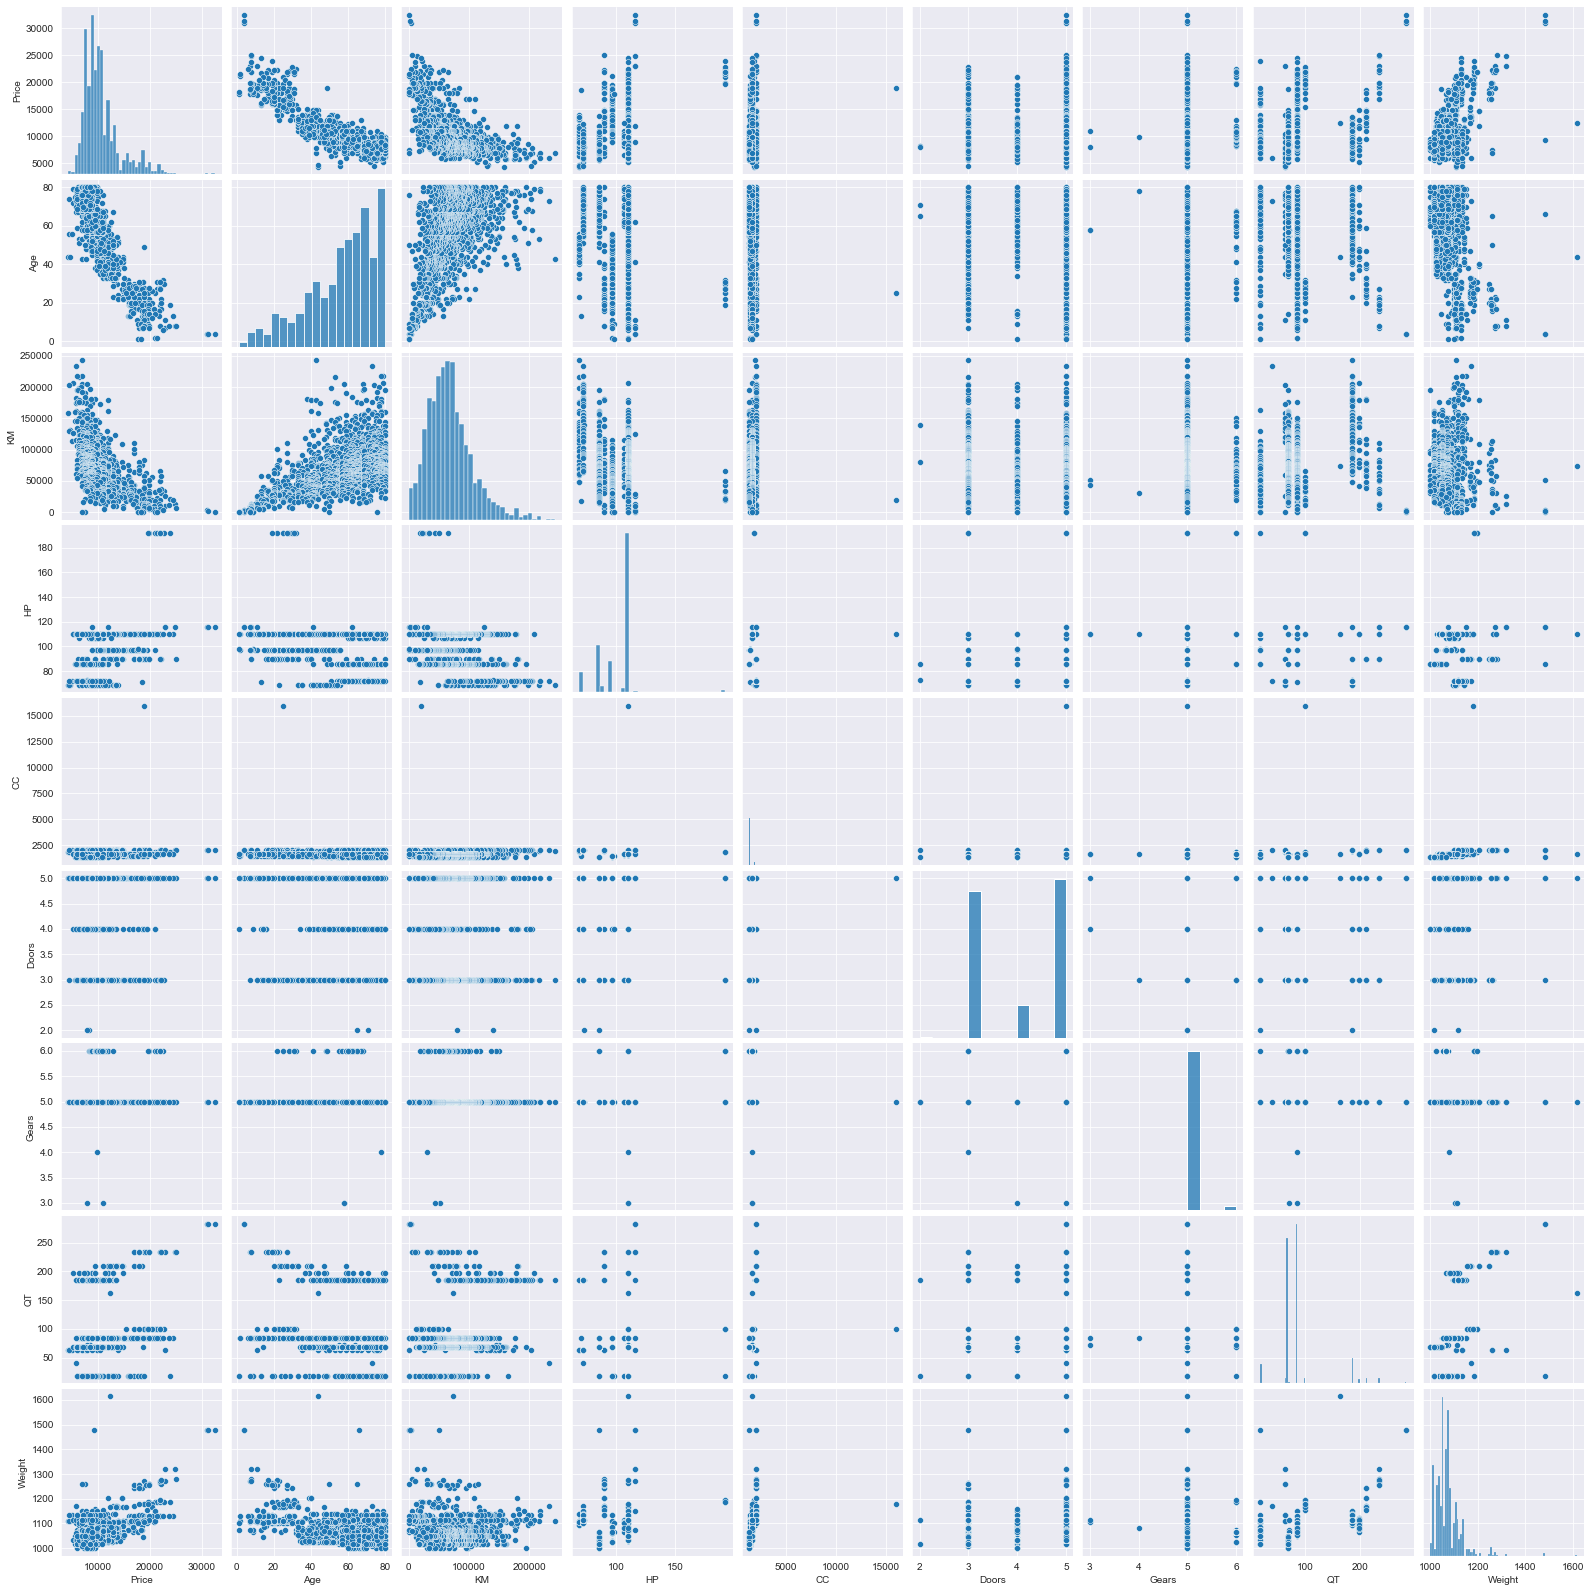

In [21]:
sns.pairplot(data3)

In [23]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=data3).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:16:58   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
ml_v=smf.ols("Price~Age",data=data3).fit()

In [27]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:20:22   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.926    138.818      0.000       2e+04    2.05e+04
Age         -170.3487      2.474    -68.847      0.000    -175.202    -165.495
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
ml_v=smf.ols("Price~KM",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          4.12e-124
Time:                        14:23:22   Log-Likelihood:                -13509.
No. Observations:                1435   AIC:                         2.702e+04
Df Residuals:                    1433   BIC:                         2.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    163.344     88.643      0.000    1.42e+04    1.48e+04
KM            -0.0548      0.002    -26.222      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
ml_v=smf.ols("Price~HP",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           3.12e-34
Time:                        14:25:10   Log-Likelihood:                -13715.
No. Observations:                1435   AIC:                         2.743e+04
Df Residuals:                    1433   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3041.1318    619.766      4.907      0.000    1825.386    4256.877
HP            75.6689      6.041     12.526      0.000      63.818      87.519
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
ml_v=smf.ols("Price~CC",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.29e-06
Time:                        14:26:10   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
ml_v=smf.ols("Price~Doors",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.40e-12
Time:                        14:28:14   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
ml_v=smf.ols("Price~Gears",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.863
Date:                Thu, 02 Dec 2021   Prob (F-statistic):             0.0156
Time:                        14:29:48   Log-Likelihood:                -13787.
No. Observations:                1435   AIC:                         2.758e+04
Df Residuals:                    1433   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4580.9348   2537.643      1.805      0.071    -396.959    9558.828
Gears       1221.5268    504.500      2.421      0.016     231.889    2211.165
==============================================================================
Omnibus:                      480.949   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.580
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                       6.690   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
ml_v=smf.ols("Price~QT",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     67.11
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           5.63e-16
Time:                        14:33:57   Log-Likelihood:                -13757.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1433   BIC:                         2.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9099.3086    218.769     41.593      0.000    8670.166    9528.451
QT            18.6348      2.275      8.192      0.000      14.173      23.097
==============================================================================
Omnibus:                      373.719   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.401
Skew:                           1.428   Prob(JB):                    1.20e-188
Kurtosis:                       5.512   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
ml_v=smf.ols("Price~Weight",data=data3).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.55e-127
Time:                        14:36:15   Log-Likelihood:                -13501.
No. Observations:                1435   AIC:                         2.701e+04
Df Residuals:                    1433   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.193e+04   1601.273    -19.938      0.000   -3.51e+04   -2.88e+04
Weight        39.7719      1.492     26.665      0.000      36.846      42.698
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=data3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=data3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=data3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=data3).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [36]:
res=ml_v.resid

In [37]:
res

0       -908.287610
1       -658.287610
2       -458.287610
3        541.712390
4       -857.147329
           ...     
1430   -1340.215477
1431    2402.503961
1432      57.503961
1433   -1192.496039
1434   -5429.918476
Length: 1435, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

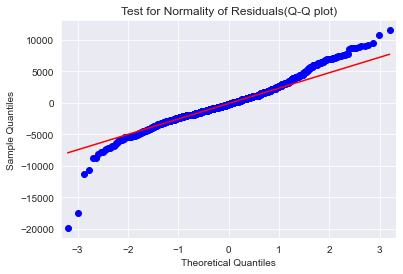

In [39]:
qqplot=sm.qqplot(res, line="q")
plt.title("Test for Normality of Residuals(Q-Q plot)")
plt.show

In [40]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [41]:
def get_standardized_values (vals) :
    return (vals - vals.mean())/vals.std()

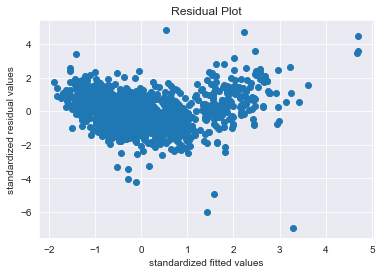

In [42]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

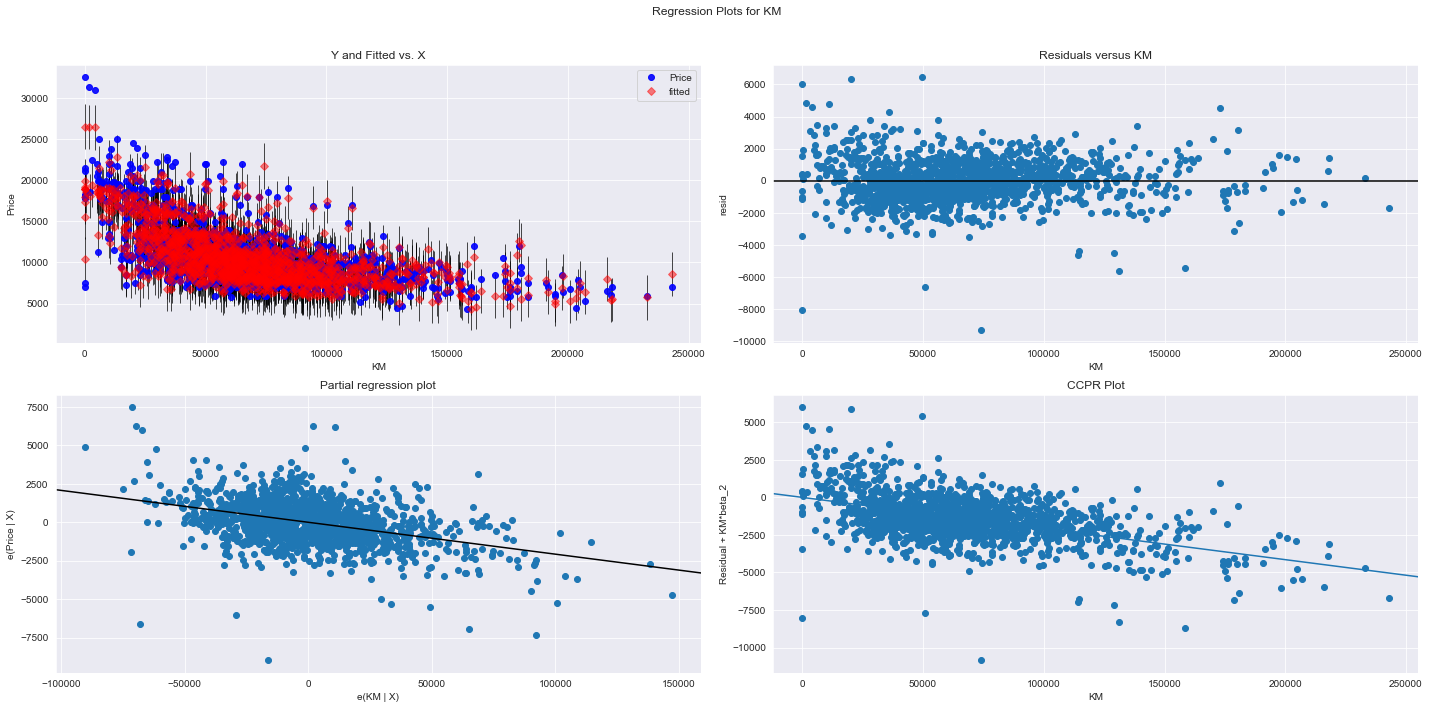

In [43]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

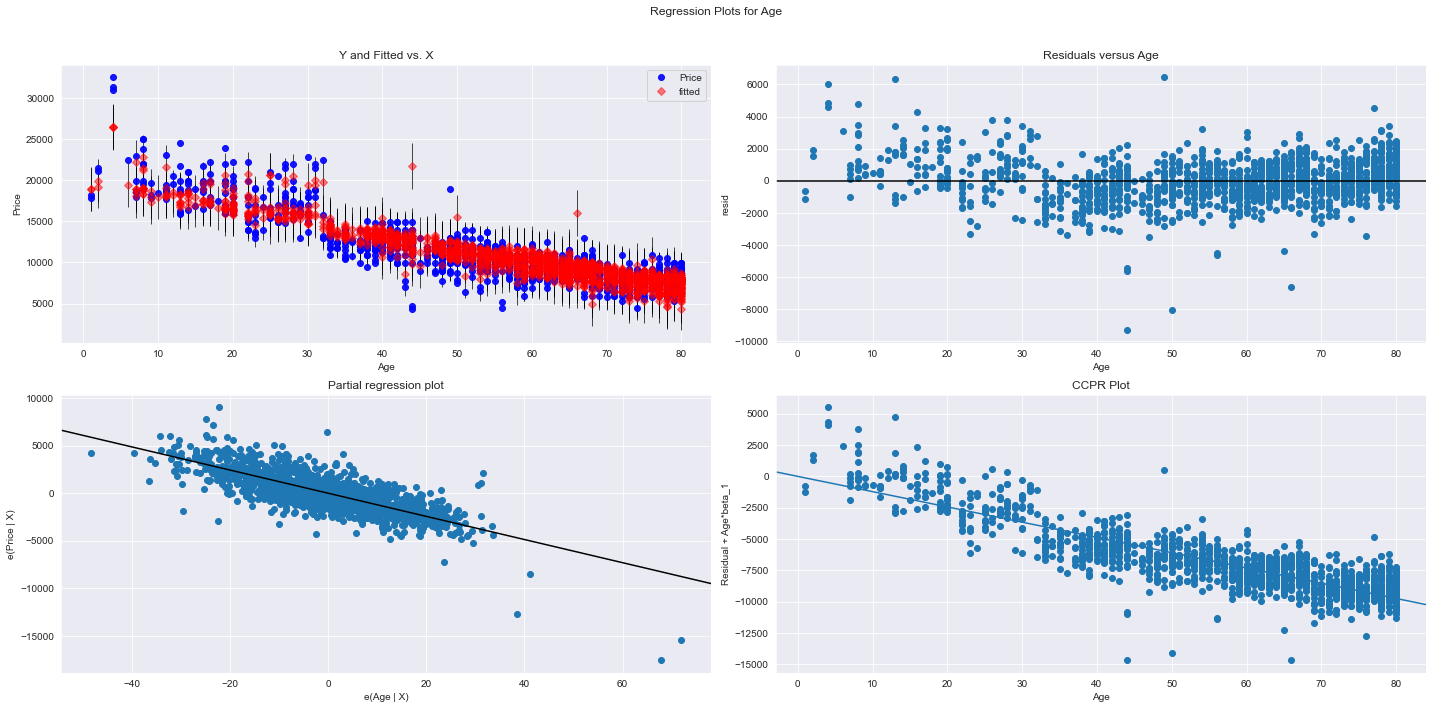

In [44]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

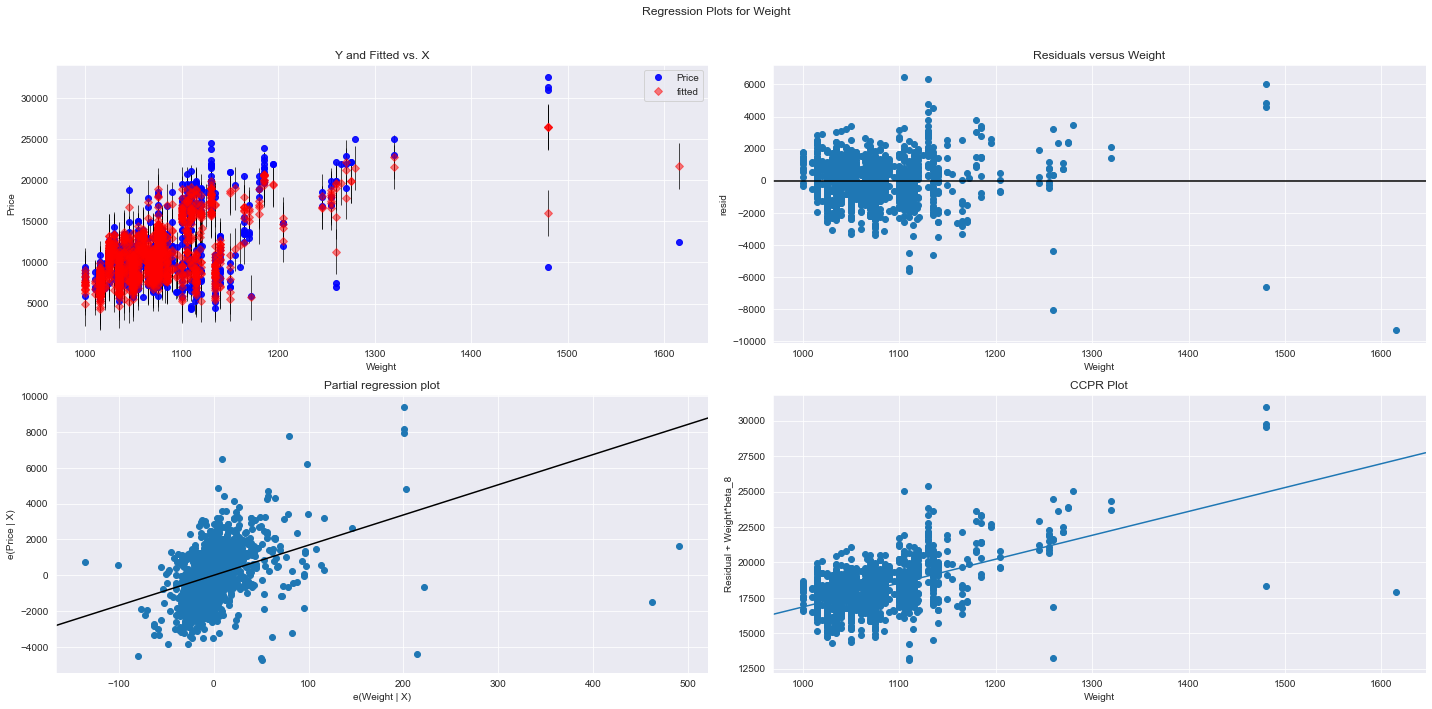

In [46]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

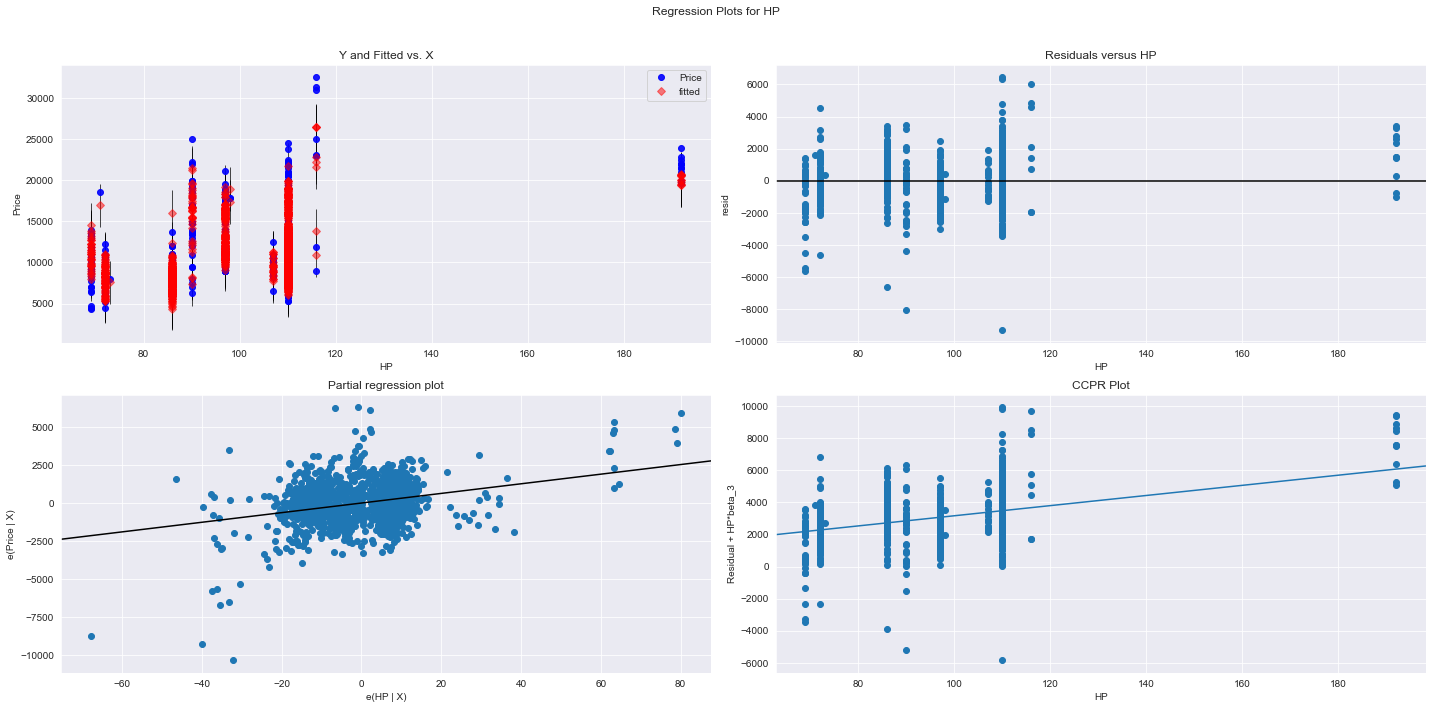

In [47]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [49]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [50]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

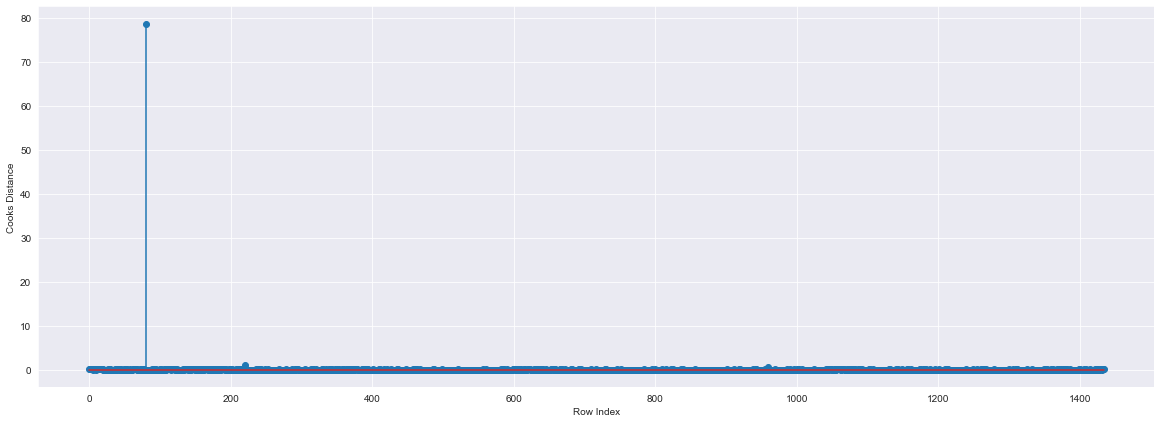

In [51]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

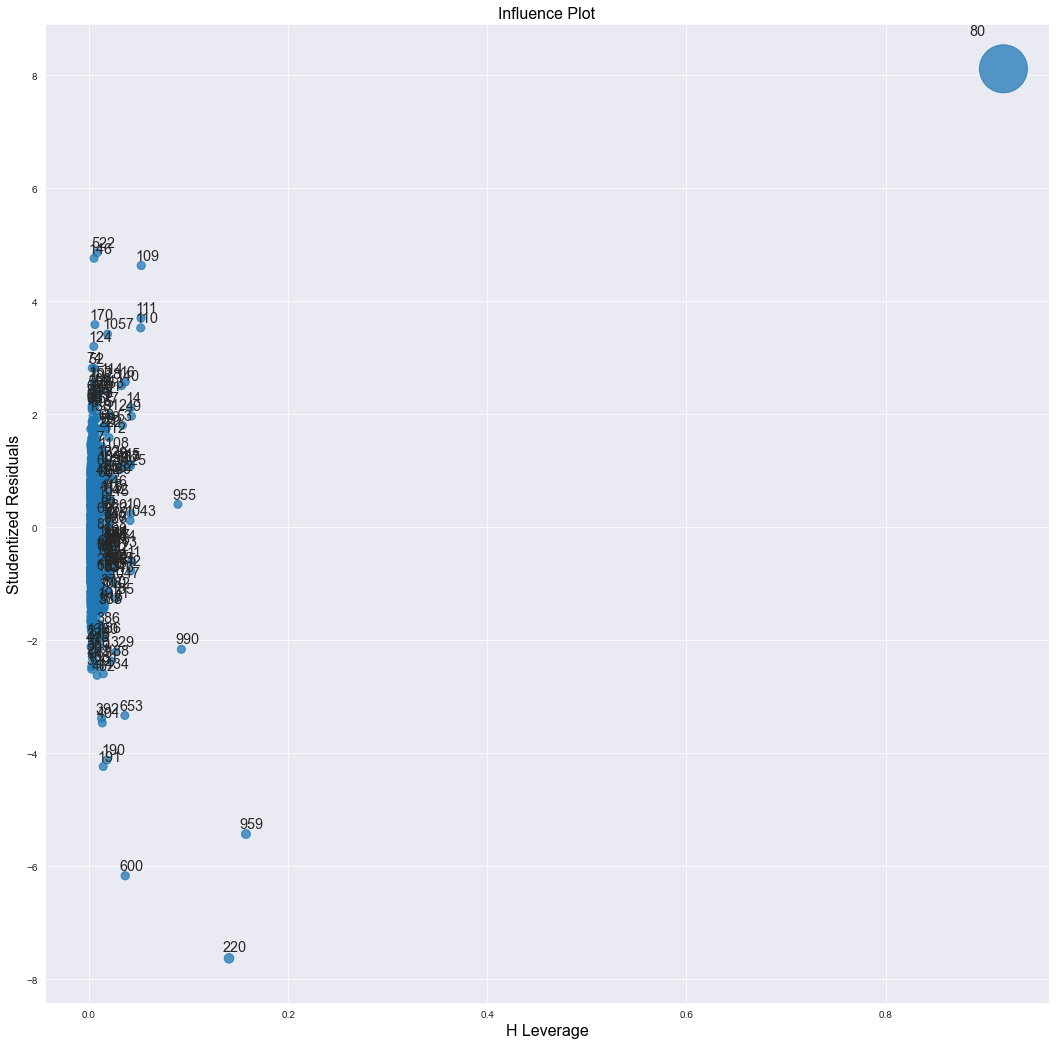

In [54]:
fig,ax=plt.subplots(figsize=(18,18))
fig=influence_plot(model,ax=ax)

In [56]:
k=data3.shape[1]
n=data3.shape[0]
leverage_cutoff= (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [58]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [59]:
data4=data3.copy()

In [60]:
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [61]:
data5=data4.drop(data4.index[[80]],axis=0).reset_index(drop=True)
data5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [63]:
new_ml_v= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = data5).fit()

In [64]:
(new_ml_v.rsquared, new_ml_v.aic)

(0.8681163912634053, 24669.363894157)

In [65]:
model_influence_V = new_ml_v.get_influence()
(c_v, _) = model_influence_V.cooks_distance

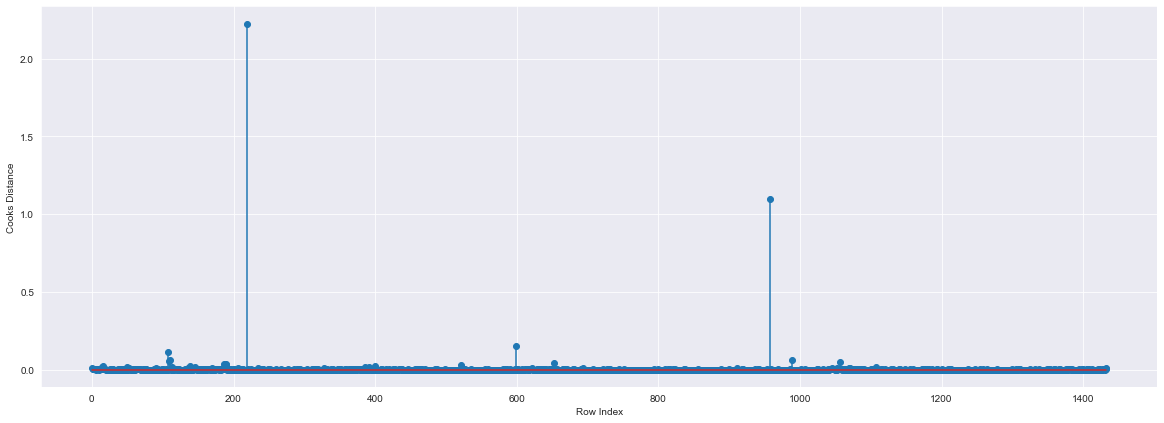

In [66]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)), np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
np.argmax(c_v), np.max(c_v)

(219, 2.2253513655270813)

In [68]:
data_new = data5.drop(data5.index[[219]],axis=0).reset_index()
data_new

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [69]:
data_new1=data_new.drop(["index"],axis=1)
data_new1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [70]:
final_ml_v=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=data_new1).fit()


In [71]:
(final_ml_v.rsquared, final_ml_v.aic)

(0.8765926307402282, 24557.748263908954)

In [72]:
new_data2=pd.DataFrame({'Age':40, 'KM':38000, 'HP':90, 'CC':1500, 'Doors':3, 'Gears':5, 'QT':100, 'Weight':1100}, index=[1])

In [73]:
new_data2

,Age,KM,HP,CC,Doors,Gears,QT,Weight
1,40,38000,90,1500,3,5,100,1100


In [74]:
final_ml_v.predict(new_data2)

1    13730.909025
dtype: float64

In [75]:
pred_y=final_ml_v.predict(data3)
pred_y

0       16453.715678
1       16006.217709
2       16428.047478
3       16086.340059
4       15908.429428
            ...     
1430     9014.516216
1431     8441.666463
1432     8592.508558
1433     8710.863036
1434    10232.595430
Length: 1435, dtype: float64